In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2021-12-05 06:28:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-05 06:28:42 (61.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
unzip_data('/content/drive/MyDrive/Untitled folder/car-damage-dataset.zip')

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (194, 259, 3)


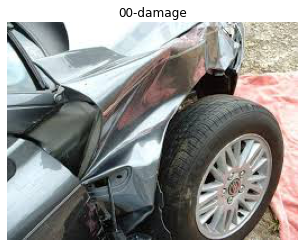

In [ ]:
# View a random image 
img = view_random_image(target_dir="/content/car-damage-dataset/data1a/training/",
                        target_class="00-damage")

In [ ]:
train="/content/car-damage-dataset/data1a/training"
test="/content/car-damage-dataset/data1a/validation"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42, subset='training' )

valid_data = test_datagen.flow_from_directory(test,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


** CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model_0 = Sequential([
  Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),

  Flatten(),
  Dense(64, activation="relu"),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_0.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_0 = model_0.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
58/58 [==============================] - 26s 217ms/step - loss: 0.6966 - accuracy: 0.5647 - val_loss: 0.6833 - val_accuracy: 0.5783
Epoch 2/5
58/58 [==============================] - 12s 203ms/step - loss: 0.6001 - accuracy: 0.6788 - val_loss: 0.5725 - val_accuracy: 0.6957
Epoch 3/5
58/58 [==============================] - 12s 197ms/step - loss: 0.5307 - accuracy: 0.7359 - val_loss: 0.5792 - val_accuracy: 0.6957
Epoch 4/5
58/58 [==============================] - 12s 202ms/step - loss: 0.4462 - accuracy: 0.8071 - val_loss: 0.4876 - val_accuracy: 0.7478
Epoch 5/5
58/58 [==============================] - 12s 206ms/step - loss: 0.3627 - accuracy: 0.8440 - val_loss: 0.4617 - val_accuracy: 0.7913


** Transfer Learning Vgg16 model

In [ ]:
vgg16_weight_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = tf.keras.applications.VGG16(
    weights=vgg16_weight_path,
    include_top=False,
    input_shape=(224, 224, 3)
)

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

# Fit the model 
history = model.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))    

Epoch 1/10
58/58 [==============================] - 38s 477ms/step - loss: 0.4398 - accuracy: 0.7995 - val_loss: 0.2583 - val_accuracy: 0.8913
Epoch 2/10
58/58 [==============================] - 18s 314ms/step - loss: 0.2463 - accuracy: 0.9000 - val_loss: 0.2420 - val_accuracy: 0.9087
Epoch 3/10
58/58 [==============================] - 18s 317ms/step - loss: 0.1964 - accuracy: 0.9168 - val_loss: 0.2132 - val_accuracy: 0.9261
Epoch 4/10
58/58 [==============================] - 18s 314ms/step - loss: 0.1464 - accuracy: 0.9408 - val_loss: 0.2260 - val_accuracy: 0.9087
Epoch 5/10
58/58 [==============================] - 18s 311ms/step - loss: 0.1257 - accuracy: 0.9549 - val_loss: 0.2063 - val_accuracy: 0.9174
Epoch 6/10
58/58 [==============================] - 18s 308ms/step - loss: 0.0932 - accuracy: 0.9663 - val_loss: 0.2184 - val_accuracy: 0.9130
Epoch 7/10
58/58 [==============================] - 18s 314ms/step - loss: 0.0774 - accuracy: 0.9788 - val_loss: 0.2107 - val_accuracy: 0.9152

In [ ]:
model.save('car damage or not detection model.h5')

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def pred_and_plot(model, filename):
  
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred=pred.round()
  if pred==0:
    pred_class="Damage"
  else:
    pred_class="No Damage"  

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


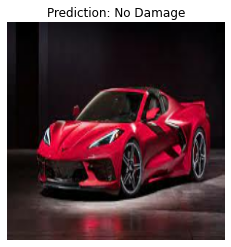

In [ ]:
# Test our model 
pred_and_plot(model, "/content/test1.jpg")

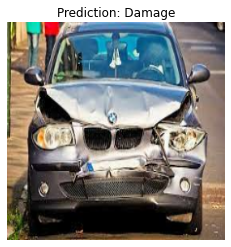

In [ ]:
pred_and_plot(model, "/content/test2.jpg")

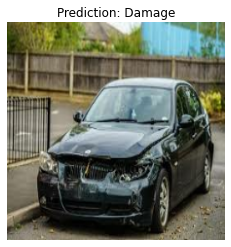

In [ ]:
pred_and_plot(model, "/content/test3.jpg")